<h1 style="color: green;">Summary</h1>

<p>
The following tasks are accomplished in this section:
<ul>
<li>Evaluating the CatBoost model</li>
<li>Comparing the CatBoost with the Random forest model</li>
<li>Visualizing Predicted probabilities by class attribute</li>
<li>Visualizing the distribution of predicted probability of class 1</li>
<li>Sensitivity threshold tuning</li>
<li>Receiver operating Characteristic Curve (ROC Curves) and Area Under the Curve (AUC)</li>
<li>Selecting Sensitivity and Specificity from ROC using a function</li>
<li>Visualizing sensitivity vs specificity threshold ranges</li>
</ul>

</p>

<h1 style="color: green;">Import libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Scaling the values
from sklearn.preprocessing import binarize

# Metrics Accuracy
from sklearn.metrics import \
accuracy_score, confusion_matrix, recall_score, roc_curve,roc_auc_score

# joblib for storing models
import joblib

import warnings
warnings.filterwarnings('ignore')

<h1 style="color: green;">Import data</h1>

In [2]:
X_test_catb = pd.read_csv("../2. Data/Classif_X_test_catb.csv")
X_test_rfc = pd.read_csv("../2. Data/Classif_X_test_rfc.csv")

In [3]:
# Extracting y_test for catb
y_test_catb = X_test_catb.target

# droping target from X_test_catb
X_test_catb.drop(['target'], axis=1, inplace=True)

In [4]:
# Extracting y_test_rfc from X_test_rfc
y_test_rfc = X_test_rfc.target

# Dropping target from X_test_rfc
X_test_rfc.drop(['target'], axis=1, inplace=True)

In [5]:
X_test_rfc.shape, X_test_catb.shape

((267, 76), (267, 19))

<h1 style="color: green;">Load stored models</h1>

In [6]:
catb_final = joblib.load('../8. Models/Classifier_models/catboost_classifier14082023')
rfc = joblib.load('../8. Models/Classifier_models/random_forest_classifier14082023')

<h1 style="color: green;">Evaluating the CatBoost model</h1>

In [7]:
final_y_pred = catb_final.predict(X_test_catb)
final_y_pred.shape

(267,)

In [8]:
final_confusion_matrix = confusion_matrix(y_test_catb,final_y_pred)
final_confusion_matrix

array([[199,   0],
       [  2,  66]])

<h1>
$\begin {bmatrix} n=267 & Predicted: 0 & Predicted: 1 & Totals
\\ Actual: 0 & 199 & 0 & 199
\\ Actual: 1 & 2 & 66  & 68
\\ Totals: & 201 & 66 & 267
\end{bmatrix}$
</h1>

<p>
As can be seen one unit has shifted from true positive to false negative, relative to the previous CatBoost model.<br> This will have a negative effect on confusion matrix derived metrics such as precision and recall.
</p>

In [9]:
# unraveling the confusion matrix
final_tn,final_fp,final_fn,final_tp = confusion_matrix(y_test_catb,final_y_pred).ravel()

<h3 style="color: green;">Sensitivity(recall)</h3>

In [10]:
final_sensitivity = recall_score(y_test_catb,final_y_pred)
print("Model 1 sensitivity via recall_score: {}".format(final_sensitivity))

Model 1 sensitivity via recall_score: 0.9705882352941176


In [11]:
# previous sensitivity for balanced data model
m2_sensitivity = 0.9852941176470589
m2_sensitivity

0.9852941176470589

In [12]:
# Sensitivity percentage improvement comparison between previous model and final selection
(final_sensitivity - m2_sensitivity)/m2_sensitivity
# There is a -0.15% drop in sensitivity from performing feature selection

-0.014925373134328417

<h3 style="color: green;">Specificity</h3>

In [13]:
final_Specificity = final_tn/(final_tn + final_fp)
print("Model 1 specificity: {}".format(final_Specificity))

Model 1 specificity: 1.0


<h3 style="color: green;">Precision</h3>

In [14]:
final_precision = final_tp / (final_tp + final_fp)
print("Final model precision: {}".format(final_precision))

Final model precision: 1.0


<h1 style="color: green;">
Comparing the CatBoost model with the Random forest model
</h1>

<h3 style="color: green;">Predicted probabilities</h3>
<p>
In binary classification classifier models assign prediction to the class 0 or 1 based on a defaullt probability<br>threshold, 0.5 i.e. a probability greater than or equal to 0.5 is assigned to 1 while probability less than 0.5 is assigned to the class 0.<br><br>The better the model the higher the probability it will assign to observations labeled as target class 1 and<br>the lower the probability it will assign to the same observation for class 0.<br><br>Below a comparison is made between the final model, CatBoost, and the Random forest model in how the probabilities are assigned.

</p>

<h3 style="color: green">Visualizing Predicted probabilities by class attribute</h3>

<p style="color: red;">Balanced data model (Random Forest) predicted probabilities </p>

In [15]:
m3_pred_prob_all = rfc.predict_proba(X_test_rfc)
m3_pred_prob_all_df = pd.DataFrame(m3_pred_prob_all, columns=['class_0','class_1'])
m3_pred_prob_all_df.head()

,class_0,class_1
0,0.936243,0.063757
1,0.982798,0.017202
2,0.880350,0.119650
3,0.322408,0.677592
4,0.927959,0.072041


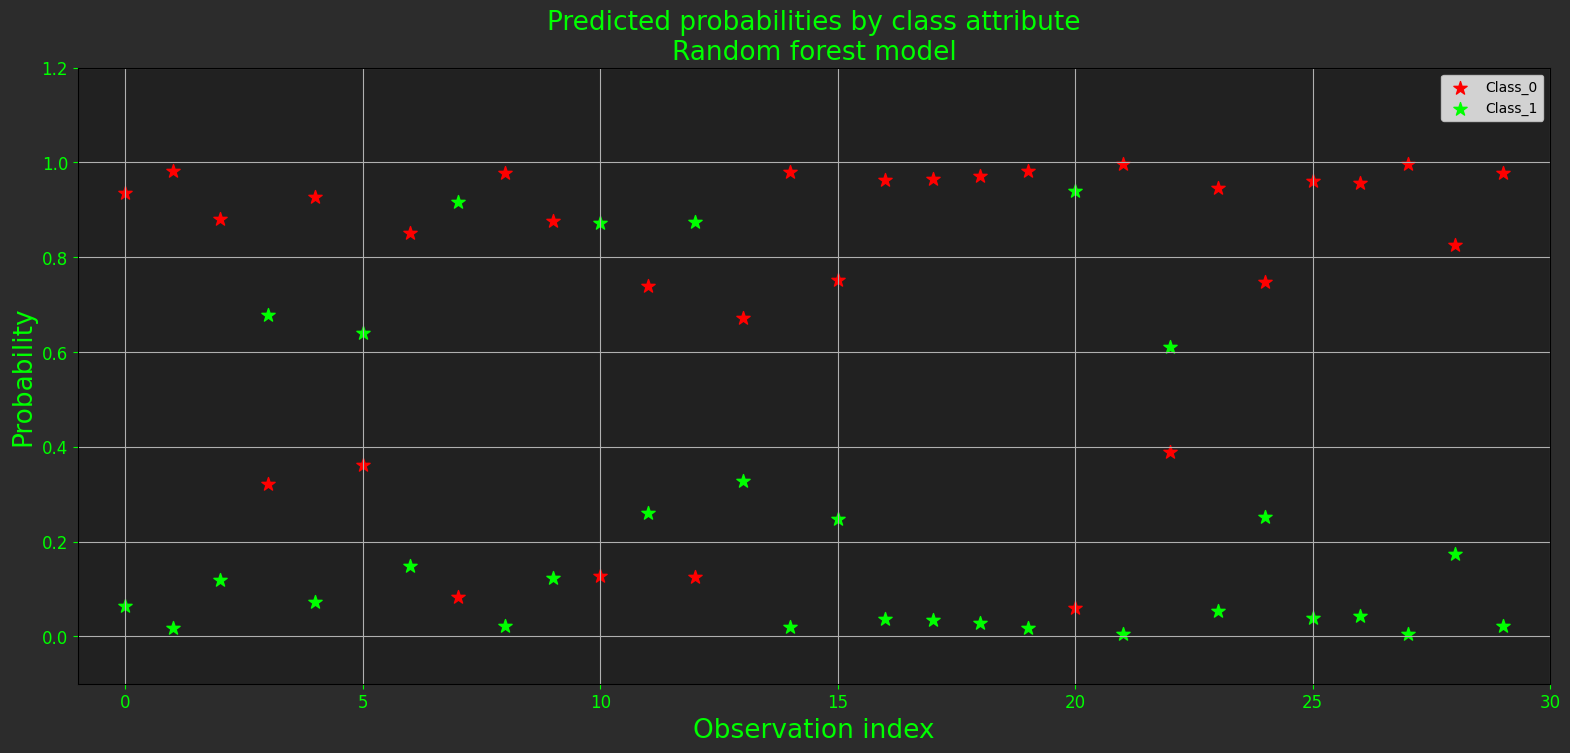

In [16]:
fig = plt.figure(figsize=(19,8))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

plt.scatter(m3_pred_prob_all_df[:30].index,
            m3_pred_prob_all_df.class_0[:30], 
            color='red', 
            marker='*', 
            s=(100), 
            label='Class_0')

plt.scatter(m3_pred_prob_all_df[:30].index, 
            m3_pred_prob_all_df.class_1[:30], 
            color='lime',
            marker='*', 
            s=(100), 
            label='Class_1')

plt.xlim([-1, 30])
plt.ylim([-0.1, 1.2])
plt.title('Predicted probabilities by class attribute\nRandom forest model', fontsize=19)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Observation index')
plt.ylabel('Probability')
# plt.legend(loc=(1.04, 0))
plt.grid()
plt.legend(loc=("best"))
plt.show()

<p>
The plot above illustrates the predicted probabilities by class attribute for each observation. The probabilities <br>are inversely related i.e. if a high probability is assigned for class_0 then class_1 will be assigned a low probability.<br>The degree of distance between the two probabilities is indicative of the discriminatory power of the model.
</p>

<p style="color: red;">Final features model(CatBoost) predicted probabilities </p>

In [17]:
final_pred_prob_all = catb_final.predict_proba(X_test_rfc)
final_pred_prob_all_df = pd.DataFrame(final_pred_prob_all, columns=['class_0','class_1'])
final_pred_prob_all_df.head()

,class_0,class_1
0,0.996558,0.003442
1,0.998716,0.001284
2,0.997737,0.002263
3,0.004712,0.995288
4,0.998763,0.001237


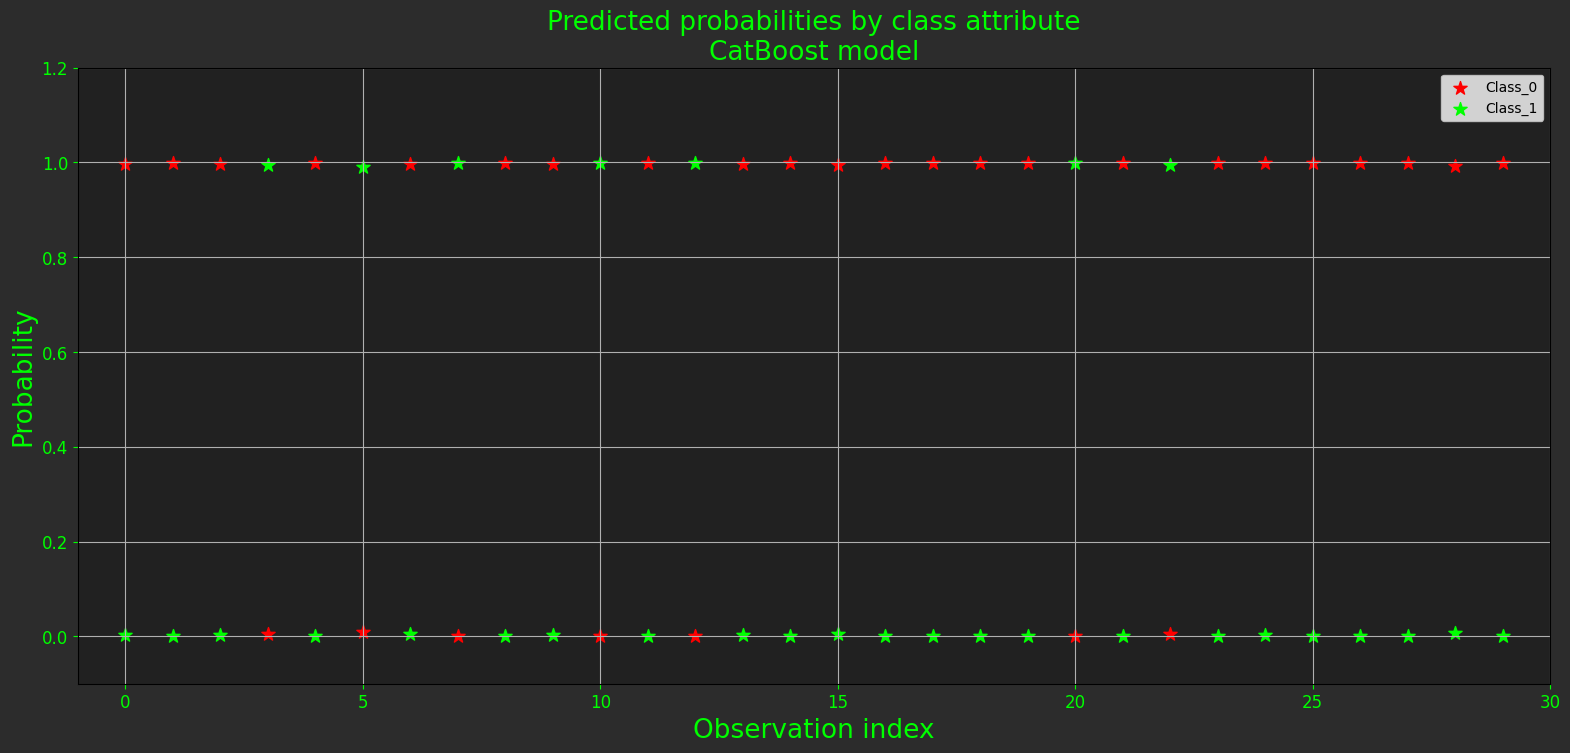

In [18]:
fig = plt.figure(figsize=(19,8))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

plt.scatter(final_pred_prob_all_df[:30].index,
            final_pred_prob_all_df.class_0[:30], 
            color='red', 
            marker='*', 
            s=(100), 
            label='Class_0')

plt.scatter(final_pred_prob_all_df[:30].index, 
            final_pred_prob_all_df.class_1[:30], 
            color='lime',
            marker='*', 
            s=(100), 
            label='Class_1')

plt.xlim([-1, 30])
plt.ylim([-0.1, 1.2])
plt.title('Predicted probabilities by class attribute\nCatBoost model', fontsize=19)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Observation index')
plt.ylabel('Probability')
# plt.legend(loc=(1.04, 0))
plt.grid()
plt.legend(loc=("best"))
plt.show()

<p>
The CatBoost model is clearly better at discriminating than the Random forest model as for the same set of observations<br>the probabilities are completely polarized. This is an ideal scenario, it shows that this model is exceptionally good at discriminating between the class attributes.
</p>

<h3 style="color: green">Pedicted probability of class 1 average</h3>

In [19]:
# Random forest
m3_pred_prob = rfc.predict_proba(X_test_rfc)[:,1]

# CatBoost final model
final_pred_prob = catb_final.predict_proba(X_test_catb)[:,1]

print("Average probability of class 1 attribute for Random forest balanced data: {}".format(m3_pred_prob.mean()))
print("Average probability of class 1 attribute for CatBoost: {}".format(final_pred_prob.mean()))


Average probability of class 1 attribute for Random forest balanced data: 0.2805442487044615
Average probability of class 1 attribute for CatBoost: 0.24909646016692008


<p style="color: black">
<b>At first look, it appears that the random forest model is assigning higher probabilities to observations than<br>
the CatBoost model. However, this is missleading: the CatBoost mean is effected by the majority low values.</b><br><br>Below both the probabilities are plotted using histograms to reveal the distributions.
</p>

<h3 style="color: green">Visualizing the distribution of predicted probability of class 1</h3>

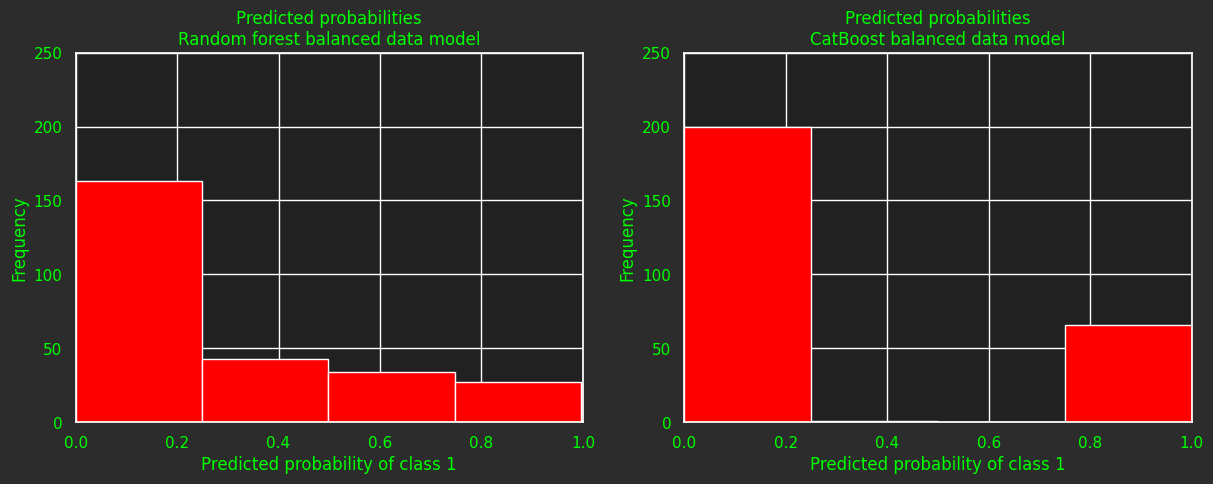

In [20]:
sb.set_style('dark')
sb.set(rc={'axes.facecolor':'#424242',
           'figure.facecolor':'#212121',
           'axes.labelcolor':'lime',
           'text.color':'lime'})

# histogram of predicted probabilities

fig, ax = plt.subplots(1, 2, figsize=plt.figaspect(1/3))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

# plotting RandomForest
ax[0].patch.set_facecolor('#212121')
ax[0].patch.set_alpha(1.0)
ax[0].yaxis.label.set_color('lime')
ax[0].xaxis.label.set_color('lime')
ax[0].title.set_color('lime')
ax[0].tick_params(colors='lime', which='both')
ax[0].set(xlabel ='Predicted probability of class 1', ylabel ='Frequency',
       xlim =(0, 1), ylim =(0, 250),
       title ='Predicted probabilities\nRandom forest balanced data model')

ax[0].hist(m3_pred_prob, bins=4, color='red')

# plotting Catboost
ax[1].patch.set_facecolor('#212121')
ax[1].patch.set_alpha(1.0)
ax[1].yaxis.label.set_color('lime')
ax[1].xaxis.label.set_color('lime')
ax[1].title.set_color('lime')
ax[1].tick_params(colors='lime', which='both')
ax[1].set(xlabel ='Predicted probability of class 1', ylabel ='Frequency',
       xlim =(0, 1), ylim =(0, 250),
       title ='Predicted probabilities\nCatBoost balanced data model')

ax[1].hist(final_pred_prob, bins=4, color='red')

plt.show()

In [21]:
final_confusion_matrix

array([[199,   0],
       [  2,  66]])

<p>
The histograms show that the CatBoost model is better at discriminating between the classes: it either assigns a <br>high probability or a low probability for class 1. Further, looking at the high probability assignment the<br> frequency is approximately in the 60s which is indicative of the true positives, 66 in the confusion matrix.<br>
This illustrates that the CatBoost model is a very powerful model.<br><br>
The Random forest model on the other hand has assigned a wide range of probabilities for class 1 i.e. there is no <br>clean split to distinguish between the class attributes.
</p>

<h1 style="color: green;">Sensitivity threshold tuning</h1>

In [22]:
m3_y_pred = rfc.predict(X_test_rfc)
m3_y_pred.shape

(267,)

In [23]:
# RandomForest confusion matrix
m3_confusion_matrix = confusion_matrix(y_test_rfc,m3_y_pred)
m3_confusion_matrix

array([[195,   4],
       [ 11,  57]])

In [24]:
# unraveling the confusion matrix
m3_tn,m3_fp,m3_fn,m3_tp = confusion_matrix(y_test_rfc,m3_y_pred).ravel()

In [25]:
# CatBoost final model confusion matrix
final_confusion_matrix

array([[199,   0],
       [  2,  66]])

<p style="color: black;">
I'm more concerned about lowering the number of shopping trips I do in a week.<br>
For the CatBoost model, I want to increase the sensitivity of the model by shifting the 2 instances in the bottom left corner<br>to the right. For the random forest I want to shift the 11 instances to the right.
This can be done by adjusting the probability threshold.<br><br>

<b>Note, these levels of sensitivity are excellent and somewhat acceptable, so the following is done mainly to<br> demonstrate knowledge in key areas rather than a neccessity born out of bad models.</b>
</p>

<p>The superiority of the final model has been adequately illustrated.<br>
</p>

<p>
From the histograms above, it seems a sensible threshold for the final model is between <b>0.25-0.3</b> as the threshold <br>for target=1 classification to transfer the two false negatives into true positives.<br><br>For the Random forest model the optimal threshold may be found in a lower range, <b>0.15-0.20</b> but this would come with a cost of<br>
more false positives i.e. observations that are class 0 incorrectly assigned to class 1.
</p>

<h3 style="color: green;">Manual threshold tuning</h3>

<h5 style="color: red;">CatBoost (final model)</h5>

In [26]:
# Threshold tuning 0.1423
final_pred_class_binarize = binarize([final_pred_prob],threshold=0.1423)[0]

In [27]:
# new confusion matrix after threshold tuning
final_binarize_confusion_matrix = confusion_matrix(y_test_catb,final_pred_class_binarize)
final_binarize_confusion_matrix

array([[199,   0],
       [  0,  68]])

<p>
After a few trials it seems <b>0.1423</b> is the optimal threshold for the final model. Such a low threshold<br>
means that the model is even better at assigning low probabilities for target = 0 class i.e. it assigns extemely <br>low probabilities for target = 0  such that any value greater than the threshold is most likely in target = 1 class.<br>
<b>Note this model has a clean split i.e. there are no overlaps in the probabilities for either class.</b>
</p>

In [28]:
# unraveling the new confusion matrix
final_Binarize_tn,final_Binarize_fp,final_Binarize_fn,final_Binarize_tp = \
confusion_matrix(y_test_catb,final_pred_class_binarize).ravel()

In [29]:
# Sensitivity
final_sensitivity_binarize = recall_score(y_test_catb,final_pred_class_binarize)

print("Original final model sensitivity: {0}".format(final_sensitivity))
print("Threshold tuned final model sensitivity: {0}".format(final_sensitivity_binarize))

Original final model sensitivity: 0.9705882352941176
Threshold tuned final model sensitivity: 1.0


In [30]:
(final_sensitivity_binarize - final_sensitivity)/final_sensitivity

0.03030303030303031

In [31]:
# Specificity
final_binarize_specificity = final_Binarize_tn/(final_Binarize_tn + final_Binarize_fp)

print("Original final model specificity: {0}".format(final_Specificity))
print("Threshold tuned model specificity: {}".format(final_binarize_specificity))

Original final model specificity: 1.0
Threshold tuned model specificity: 1.0


In [32]:
(final_binarize_specificity - final_Specificity)/final_Specificity

0.0

<p>
Above, there is a 3% improvement in sensitivity resulting from the threshold tuning with the CatBoost model.<br>
This comes at no cost with respect to specificity i.e. there is no transfer of true negatives into false positives.<br>
Note, this is a reflection of how powerful this model is in discriminating between the class attributes.
</p>

<h5 style="color: red;">Random forest</h5>

In [33]:
m3_sensitivity = recall_score(y_test_rfc,m3_y_pred)

In [34]:
m3_Specificity = m3_tn/(m3_tn + m3_fp)

In [35]:
# Threshold tuning
m3_pred_class_binarize = binarize([m3_pred_prob],threshold=0.2467)[0]

In [36]:
# new confusion matrix after threshold tuning
m3_binarize_confusion_matrix = confusion_matrix(y_test_rfc,m3_pred_class_binarize)
m3_binarize_confusion_matrix

array([[159,  40],
       [  0,  68]])

<p>
After a few trials it seems 0.2467 is the optimal threshold for the random forest model. Note this model does not<br>have a clean split. This makes it difficult to transfer the false negatives into true positives without<br>
increasing the false positives i.e. increasing the sensitivity of the model incurs costs in specificity.<br><br>
<b>Sensitivity and specificity are inversely related: increasing one reduces the other; the exception being perfect models.</b>


</p>

In [37]:
# unraveling the rfc binarized confusion matrix
rfc_Binarize_tn,rfc_Binarize_fp,rfc_Binarize_fn,rfc_Binarize_tp = \
confusion_matrix(y_test_rfc,m3_pred_class_binarize).ravel()

In [38]:
# Sensitivity
rfc_sensitivity_binarize = recall_score(y_test_rfc,m3_pred_class_binarize)

print("Original random forest model sensitivity: {0}".format(m3_sensitivity))
print("Threshold tuned random forest model sensitivity: {0}".format(rfc_sensitivity_binarize))
print("Percentage change in sensitivity: {0}".format((rfc_sensitivity_binarize - m3_sensitivity)/rfc_sensitivity_binarize))

Original random forest model sensitivity: 0.8382352941176471
Threshold tuned random forest model sensitivity: 1.0
Percentage change in sensitivity: 0.16176470588235292


In [39]:
# Specificity
rfc_binarize_specificity = rfc_Binarize_tn/(rfc_Binarize_tn + rfc_Binarize_fp)

print("Original random forest model specificity: {0}".format(m3_Specificity))
print("Threshold tuned random forest model specificity: {}".format(rfc_binarize_specificity))
print("Percentage change in specificity: {0}".format((rfc_binarize_specificity - m3_Specificity)/m3_Specificity))

Original random forest model specificity: 0.9798994974874372
Threshold tuned random forest model specificity: 0.7989949748743719
Percentage change in specificity: -0.18461538461538463


<p>
For the random forest model there is a 16% increase in sensitivity resulting from threshold tuning but this<br>
incurs a cost of 18% drop in specificity. This reflects the relative inferiority of this random forest model over <br>the CatBoost model.
</p>

<h3 style="color: green;">Receiver operating Characteristic Curve (ROC Curves) and Area Under the Curve (AUC)</h3>

In [40]:
# CatBoost
final_fpr, final_tpr, final_thresholds = roc_curve(y_test_catb, final_pred_prob)

# Random forest
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test_rfc, m3_pred_prob)

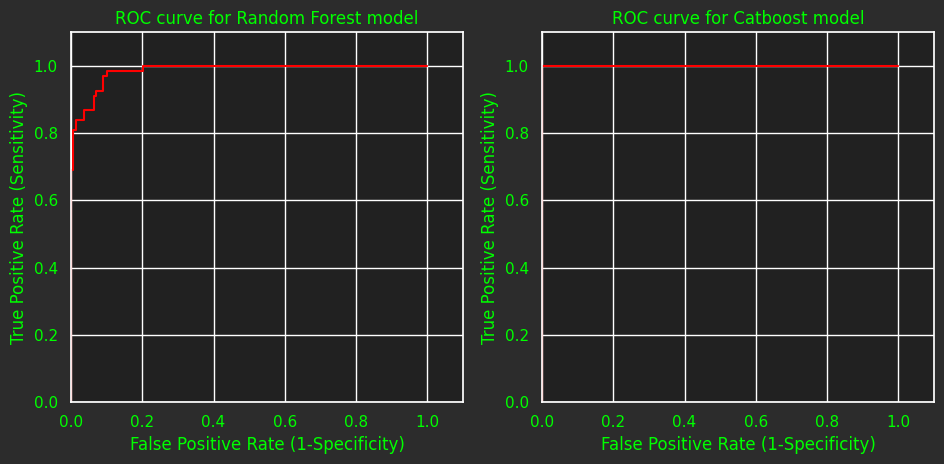

In [41]:
sb.set_style('dark')
sb.set(rc={'axes.facecolor':'#424242',
           'figure.facecolor':'#212121',
           'axes.labelcolor':'lime',
           'text.color':'lime'})

# histogram of predicted probabilities

fig, ax = plt.subplots(1, 2, figsize=plt.figaspect(1/2))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

# plotting RandomForest
ax[0].patch.set_facecolor('#212121')
ax[0].patch.set_alpha(1.0)
ax[0].yaxis.label.set_color('lime')
ax[0].xaxis.label.set_color('lime')
ax[0].title.set_color('lime')
ax[0].tick_params(colors='lime', which='both')
ax[0].set(xlabel ='False Positive Rate (1-Specificity)', ylabel ='True Positive Rate (Sensitivity)',
       xlim =(0, 1.1), ylim =(0, 1.1),
       title ='ROC curve for Random Forest model')

ax[0].plot(rfc_fpr, rfc_tpr, color='red')

# plotting Catboost
ax[1].patch.set_facecolor('#212121')
ax[1].patch.set_alpha(1.0)
ax[1].yaxis.label.set_color('lime')
ax[1].xaxis.label.set_color('lime')
ax[1].title.set_color('lime')
ax[1].tick_params(colors='lime', which='both')
ax[1].set(xlabel ='False Positive Rate (1-Specificity)', ylabel ='True Positive Rate (Sensitivity)',
       xlim =(0, 1.1), ylim =(0, 1.1),
       title ='ROC curve for Catboost model')

ax[1].plot(final_fpr, final_tpr, color='red')

plt.tight_layout()
plt.show()

<p>The ROC curve is a measure of the discriminatory power of the model in distinguishing between the class attributes.<br>The more the curve hogs the top left hand corner, the better the model i.e. higher sensitivity and specificity.<br>The CatBoost ROC curve covers the entire area/grid while the Random forest ROC curve has a little room<br>left on the top left hand corner.<br>This is yet another illustration of the superiority of the CatBoost model in discriminating between the class attributes(0,1).
</p>

<h3 style="color: green;">Area Under the Curve (AUC)</h3>

In [42]:
# AUC(Area under the curve) Random forest

print(f"Random forest AUC(Area under the curve): {roc_auc_score(y_test_rfc, m3_pred_prob)}")

print(f"CatBoost AUC(Area under the curve): {roc_auc_score(y_test_catb, final_pred_prob)}")

Random forest AUC(Area under the curve): 0.9855897132722437
CatBoost AUC(Area under the curve): 1.0


<p>
To complement the ROC curve illustration of the models, the AUC calculations show that the CatBoost model AUC is <br>very high, 0.985, almost 1.0 while the Random forest model AUC is relatively less at 0.986. Note, both are<br>
very high AUCs.
</p>

<h1 style="color: green;">Selecting Sensitivity and Specificity from ROC using a function</h1>

In [43]:
# CatBoost
final_fpr, final_tpr, final_thresholds = roc_curve(y_test_catb, final_pred_prob)

# Random forest
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test_rfc, m3_pred_prob)

In [44]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold, tpr,fpr, thresholds):
    print("Sensitivity: ",tpr[thresholds > threshold][-1])
    print("Specificity: {}".format(1 -fpr[thresholds > threshold][-1]))

In [45]:
# Sensitivity and specificity for CatBoost model with a given threshold, 0.1423
evaluate_threshold(0.1423, final_tpr,final_fpr, final_thresholds)

Sensitivity:  1.0
Specificity: 1.0


In [46]:
# Sensitivity and specificity for Random forest model with a given threshold, 0.2467
evaluate_threshold(0.2467, rfc_tpr, rfc_fpr, rfc_thresholds)

Sensitivity:  1.0
Specificity: 0.7989949748743719


<p style="color: black;"><b>
The function above is very useful, infact it should be the first point of call<br>
for threshold tuning.
</b></p>

<h3 style="color: green;">Visualizing sensitivity vs specificity threshold ranges</h3>

In [47]:
# Threshold ranges
range_ = [
            0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.015,
            0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075,
            0.08, 0.085, 0.09, 0.095, 0.1, 0.11, 0.12, 0.125, 0.13, 0.133,
            0.135, 0.137, 0.138, 0.139, 0.14, 0.141, 0.142, 0.143, 0.145, 0.147,
            0.149, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.235, 0.238,
            0.24, 0.241, 0.243, 0.244, 0.245, 0.246, 0.247, 0.248, 0.249, 0.25, 0.3, 0.35, 0.4,
            0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
            0.89, 0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99    
         ]

In [48]:
def thresholds_illustration(threshold_values, predicted_prob, y_test):
    
    thresholds_list = []

    for value_ in threshold_values:
        thresh = []
        thresh.append(value_)

        # Threshold tuning 0.1423
        pred_class_binarize = binarize([predicted_prob],threshold=value_)[0]

        # unraveling the new confusion matrix
        Binarize_tn,Binarize_fp,Binarize_fn,Binarize_tp = \
        confusion_matrix(y_test, pred_class_binarize).ravel()

        # Sensitivity
        sensitivity_binarize = recall_score(y_test,pred_class_binarize)
        
        # Append sensitivity to thresh
        thresh.append(sensitivity_binarize)

        # Specificity
        binarize_specificity = Binarize_tn/(Binarize_tn + Binarize_fp)
        
        # append specificity
        thresh.append(binarize_specificity)

        # Append to thresh to thresholds_list
        thresholds_list.append(thresh)

    return thresholds_list

In [49]:
# Retrieve thresholds, sensitivity and specificity data
rfc_thresh_data = thresholds_illustration(range_, m3_pred_prob, y_test_rfc)
rfc_thresh_data_df = pd.DataFrame(rfc_thresh_data, columns=['threshold', 'sensitivity','specificity'])

catb_thresh_data = thresholds_illustration(range_, final_pred_prob, y_test_catb)
catb_thresh_data_df = pd.DataFrame(catb_thresh_data, columns=['threshold', 'sensitivity','specificity'])

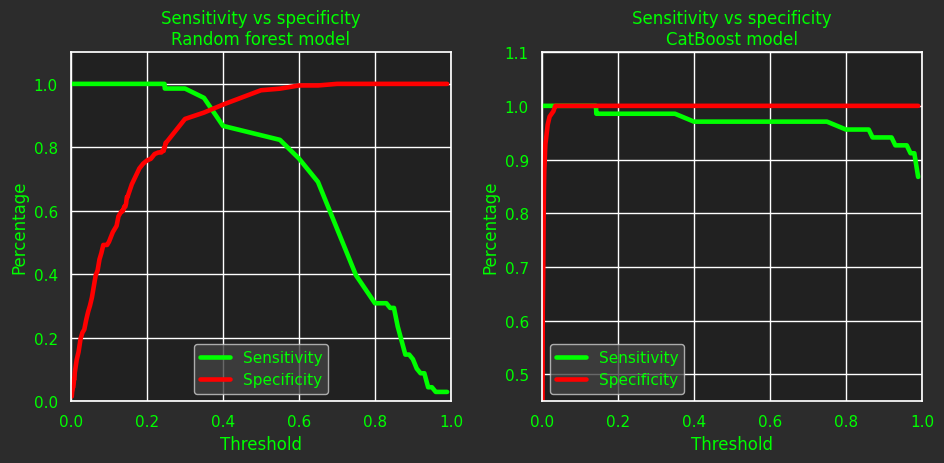

In [50]:
sb.set_style('dark')
sb.set(rc={'axes.facecolor':'#424242',
           'figure.facecolor':'#212121',
           'axes.labelcolor':'lime',
           'text.color':'lime'})

# histogram of predicted probabilities

fig, ax = plt.subplots(1, 2, figsize=plt.figaspect(1/2))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

# plotting RandomForest
ax[0].patch.set_facecolor('#212121')
ax[0].patch.set_alpha(1.0)
ax[0].yaxis.label.set_color('lime')
ax[0].xaxis.label.set_color('lime')
ax[0].title.set_color('lime')
ax[0].tick_params(colors='lime', which='both')
ax[0].set(xlabel ='Threshold', ylabel ='Percentage',
       xlim =(0, 1.0), ylim =(0, 1.1),
       title ='Sensitivity vs specificity\nRandom forest model')

ax[0].plot(rfc_thresh_data_df.threshold, rfc_thresh_data_df.sensitivity, 
         color='lime',lw=3.3, label='Sensitivity')
ax[0].plot(rfc_thresh_data_df.threshold, rfc_thresh_data_df.specificity, 
         color='red',lw=3.3, label='Specificity')

ax[0].legend()

# plotting Catboost
ax[1].patch.set_facecolor('#212121')
ax[1].patch.set_alpha(1.0)
ax[1].yaxis.label.set_color('lime')
ax[1].xaxis.label.set_color('lime')
ax[1].title.set_color('lime')
ax[1].tick_params(colors='lime', which='both')
ax[1].set(xlabel ='Threshold', ylabel ='Percentage',
       xlim =(0, 1.0), ylim =(0.45, 1.1),
       title ='Sensitivity vs specificity\nCatBoost model')

ax[1].plot(catb_thresh_data_df.threshold, catb_thresh_data_df.sensitivity, 
         color='lime',lw=3.3, label='Sensitivity')
ax[1].plot(catb_thresh_data_df.threshold, catb_thresh_data_df.specificity, 
         color='red',lw=3.3, label='Specificity')
ax[1].legend()

plt.tight_layout()
plt.show()

<p>
The plots show that the CatBoost model sensitivity is not as responsive as the Random forest counterpart at low <br> thresholds. It's only past the 0.8 threshold that it becomes more responsive. This is evidenced by the<br>
negative steepening sensitivity curve. This reflects the CatBoost model's assignment of high probability to true <br>positives i.e. observations that are in target class 1 were assigned higher probabilities for class 1.<br>
As such they are clustered near 1.<br><br>
The specificity of the CatBoost model is highly responsive at low thresholds: This is due to the assignment of<br>
low probabilities for class 1 for observations labeled as class 0; equally, assigning high probabilities for<br>
class 0 for observations that are labeled as class 0. As a result, all of the true negatives are caught and there <br>are no false positives.<br><br>
Since the Random forest model does not discriminate as well, it's sensitivity and specificity are more responsive <br>to variations in thresholds.
</p>

<h1 style="color: green;">Threshold tuning choice</h1>

<p>
Since the CatBoost model was chosen as the final model and through trial and error in threshold tuning 0.1423 was<br>found to be the optimal threshold, up to 4 decimal places; this is also visible in the sensitivity vs specificity plots above; for deployment <b>0.1423<b/> shall be the threshold for binarization.
</p>

<h1 style="color: green;">Conclusion</h1>
<p>
The superiority of the final model, CatBoost, has been demonstrated. The model has high sensitivity and specificity.<br>With respect to threshold tuning a trial and error process determinded that <b>0.1423</b> is the optimal threshold to capture<br>the false negative and transfer them to true positives.
</p>